# Test the retrained YOLO model

Now that we have retrained our model we can test it against our 'test' images.  After the training was completed, the model was saved as 'best.pt' in the 'weights' folder.  We created a 'models' folder and copied best.pt into that folder.  

Let's install our python and ultralyitcs packages and then load our 'best' model.  

In [1]:
!pip install ultralytics
from ultralytics import YOLO


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In the last notebook we re-trained the model.  YOLO automatically saves our model re-training runs in the runs/detect/train/weights folder.  The re-trained model with the highest precision is exported to /runs/detect/train/weights/best.pt.  For convenience, we have copied the 'best.pt' model into the 'models' folder.

In [2]:
#get the newly trained model.
#model = YOLO("models/best.pt")
model = YOLO("https://rhods-public.s3.amazonaws.com/demo-models/ic-models/accident/accident_detect.onnx")

  0%|          | 0.00/98.8M [00:00<?, ?B/s]

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


In [3]:
#test the model against a car accident image
results = model.predict("images/carImage1.jpg")  #accident     >.88 percent


Loading accident_detect.onnx for ONNX Runtime inference...
requirements: Ultralytics requirement ['onnxruntime'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 119.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 206.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 310.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 251.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 326.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 9.6s, installed 1 package: ['onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect




[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip



image 1/1 /opt/app-root/src/insurance-claim-processing/lab-materials/04/images/carImage1.jpg: 640x640 1 severe, 182.2ms
Speed: 7.3ms preprocess, 182.2ms inference, 69.0ms postprocess per image at shape (1, 3, 640, 640)


In [4]:
#write code to get this info (for all of our detected boxes) in a loop, get object type, coords, probability
result = results[0]
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: severe
Coordinates: [1, 24, 187, 216]
Probability: 0.88
---


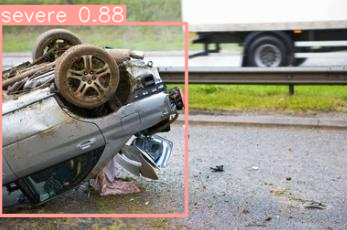

In [5]:
#In the photo place boxes listing name, probability around each car (object type)
from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])

In examining 'carImage1.jpg' the re-trainined YOLO model correctly predicts a 'car accident' with 88% confidence.  A box is then drawn around the car accident and labelled with 'severe 0.88'.

Now that we have a model which can detect accident severity, lets create a predict function and mannually serve our prediction model.  <B>Please go to notebook 04-05-serving-mannual.ipynb </B>